<a href="https://colab.research.google.com/github/pjmaguire/find_me_music/blob/main/Find_Me_Music.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries & Functions

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import json
from ast import literal_eval
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import roc_curve
#from sklearn.metrics import roc_auc_score

In [ ]:
def data_report(data, figures=True):
  """
  Reports summary statistics and figures for a data frame.

  Inputs: data - a dataframe of uniform or mixed variables
  Outputs: None
  """
  #Libraries
  from pandas.api.types import is_string_dtype
  from pandas.api.types import is_numeric_dtype

  for col in data.columns:
    print("{}\n".format(col))
    #print(type(lc_data[col]))

    #Numerical Values
    if is_numeric_dtype(data[col]):
      print("Type:\tNumeric")
      clean = data[col].dropna()
      if len(clean) != 0:
        print("Range:\t{} - {}".format(min(clean), max(clean)))
        
        if figures:
          data[col].plot(kind='hist', title=col.capitalize())
          plt.show() 

    #String Values
    elif is_string_dtype(data[col]):
      print("Type:\tString")
      print("Values:") 
      print(data[col].unique())

      #Checks For URL Data
      #Note: Assumes that any URL means that the variable should not have a figure generated
      if not (any(data[col].str.contains("http"))):
        if figures:
          data[col].value_counts().plot(kind='barh', title=col.capitalize())
          plt.show()

    #Unknown
    else:
      print("Type:\tUnknown")


    print("NAs:\t{}".format(data[col].isna().sum()))

    print("\n_____________________\n")

# Data Loading

In [85]:
#Loads In Artist And Track Info
local = False
git = True

if local:
  artists = pd.read_csv("/Users/pmaguire/Dropbox/Stanford/Courses/CS68/Data/Spotify_Data/artists.csv")
  tracks = pd.read_csv("/Users/pmaguire/Dropbox/Stanford/Courses/CS68/Data/Spotify_Data/tracks.csv")
elif git:
  artists = pd.read_csv("https://media.githubusercontent.com/media/pjmaguire/find_me_music/main/Data/artists.csv")
  tracks = pd.read_csv("https://media.githubusercontent.com/media/pjmaguire/find_me_music/main/Data/tracks.csv")

#Loads In Related Artist Data
#with open("/Users/pmaguire/Dropbox/Stanford/Courses/CS68/Data/Spotify_Data/dict_artists.json") as file:
#  data = json.load(file)
#  related_artists = pd.DataFrame.from_dict(data, orient='index').T.set_index('index')   

# Variable Summary

**Artists**

In [51]:
artists.head(25)

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0
5,0DotfDlYMGqkbzfBhcA5r6,7.0,[],Astral Affect,0
6,0DqP3bOCiC48L8SM9gK4W8,1.0,[],Yung Seed,0
7,0Drs3maQb99iRglyTuxizI,0.0,[],Wi'Ma,0
8,0DsPeAi1gxPPnYjgpiEGSR,0.0,[],lentboy,0
9,0DtvnTxgZ9K5YaPS5jdlQW,20.0,[],addworks,0


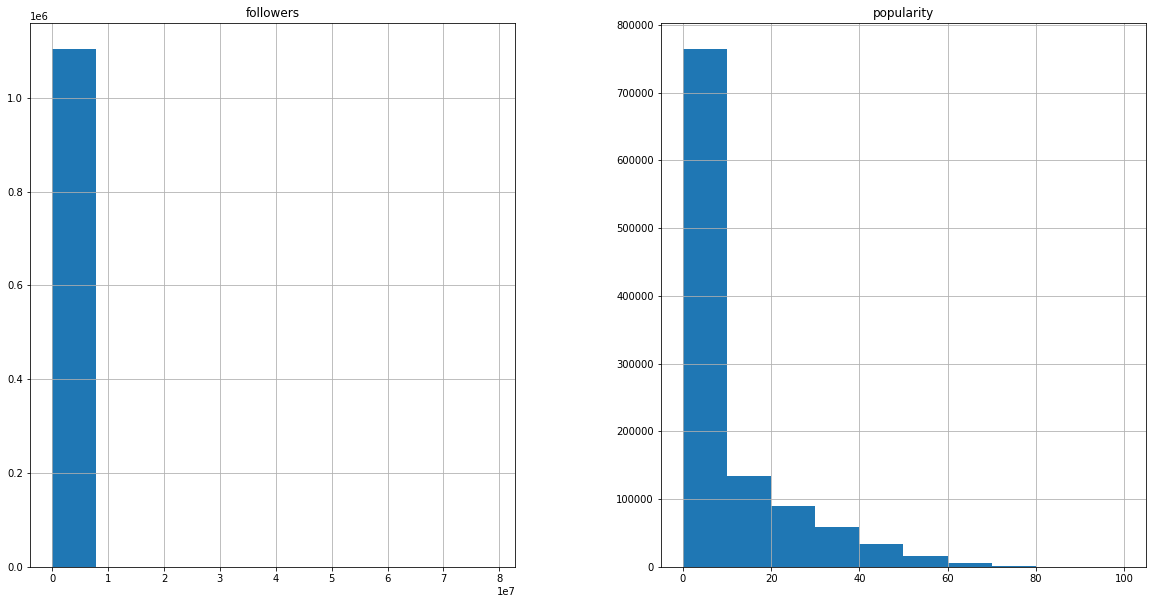

In [52]:
artists.hist(figsize=(20, 10))
plt.show()

In [53]:
data_report(artists, figures=False)

id

Type:	String
Values:
['0DheY5irMjBUeLybbCUEZ2' '0DlhY15l3wsrnlfGio2bjU'
 '0DmRESX2JknGPQyO15yxg7' ... '2vnT9YhKIvjVo9LnVjWmr2'
 '3ID0E5XCvnJIYZEq043ZoB' '5m0Y4WSYyai2BU752lCASy']
NAs:	0

_____________________

followers

Type:	Numeric
Range:	0.0 - 78900234.0
NAs:	13

_____________________

genres

Type:	String
Values:
['[]' "['carnaval cadiz']" "['classical harp', 'harp']" ...
 "['alternative dance', 'dance-punk', 'electrofox', 'new rave', 'swedish electropop']"
 "['emoviolence', 'metallic hardcore']"
 "['australian post-hardcore', 'metallic hardcore']"]
NAs:	0

_____________________

name

Type:	String
Values:
['Armid & Amir Zare Pashai feat. Sara Rouzbehani' 'ปูนา ภาวิณี' 'Sadaa'
 ... 'Jesse Giddings' 'The Boy Band Project' '10 Reasons']
NAs:	0

_____________________

popularity

Type:	Numeric
Range:	0 - 100
NAs:	0

_____________________



**Tracks**

In [54]:
tracks.head(25)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
5,0BRXJHRNGQ3W4v9frnSfhu,Ave Maria,0,178933,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.227,0.2610,5,-12.343,1,0.0382,0.994,0.247000,0.0977,0.0539,118.891,4
6,0Dd9ImXtAtGwsmsAD69KZT,La Butte Rouge,0,134467,0,['Francis Marty'],['2nuMRGzeJ5jJEKlfS7rZ0W'],1922,0.510,0.3550,4,-12.833,1,0.1240,0.965,0.000000,0.1550,0.7270,85.754,5
7,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,['Mistinguett'],['4AxgXfD7ISvJSTObqm4aIE'],1922,0.563,0.1840,4,-13.757,1,0.0512,0.993,0.000016,0.3250,0.6540,133.088,3
8,0IgI1UCz84pYeVetnl1lGP,Old Fashioned Girl,0,310073,0,['Greg Fieler'],['5nWlsH5RDgFuRAiDeOFVmf'],1922,0.488,0.4750,0,-16.222,0,0.0399,0.620,0.006450,0.1070,0.5440,139.952,4
9,0JV4iqw2lSKJaHBQZ0e5zK,Martín Fierro - Remasterizado,0,181173,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-29,0.548,0.0391,6,-23.228,1,0.1530,0.996,0.933000,0.1480,0.6120,75.595,3


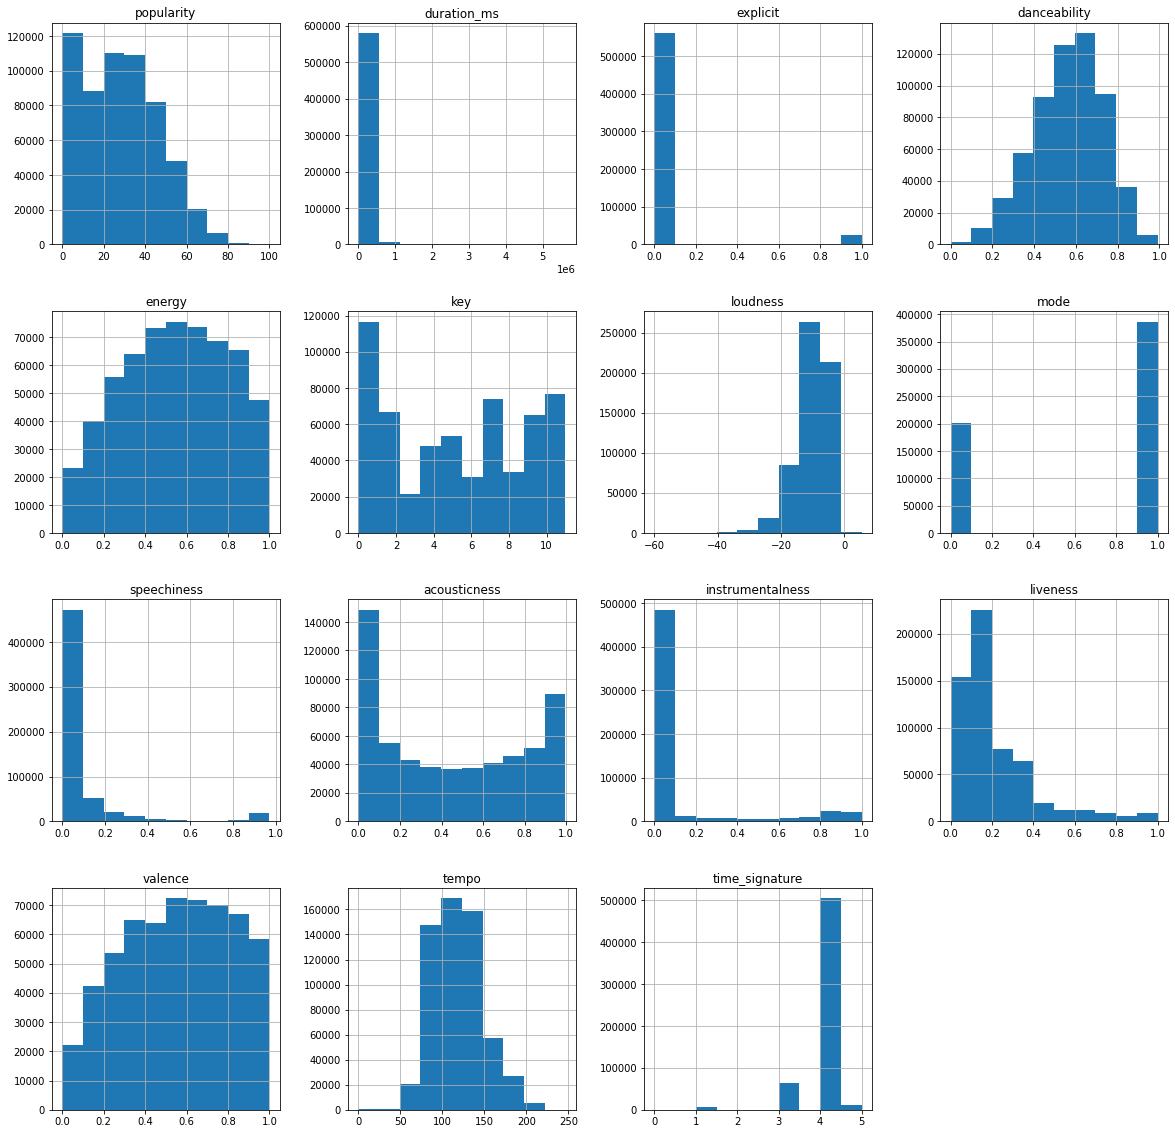

In [55]:
tracks.hist(figsize=(20, 20))
plt.show()

In [86]:
data_report(tracks, figures=False)

id

Type:	String
Values:
['35iwgR4jXetI318WEWsa1Q' '021ht4sdgPcrDgSk7JTbKY'
 '07A5yehtSnoedViJAZkNnc' ... '27Y1N4Q4U3EfDU5Ubw8ws2'
 '45XJsGpFTyzbzeWK8VzR8S' '5Ocn6dZ3BJFPWh4ylwFXtn']
NAs:	0

_____________________

name

Type:	String
Values:
['Carve' 'Capítulo 2.16 - Banquero Anarquista'
 'Vivo para Quererte - Remasterizado' ... 'blind'
 "What They'll Say About Us" 'A Day At A Time']
NAs:	71

_____________________

popularity

Type:	Numeric
Range:	0 - 100
NAs:	0

_____________________

duration_ms

Type:	Numeric
Range:	3344 - 5621218
NAs:	0

_____________________

explicit

Type:	Numeric
Range:	0 - 1
NAs:	0

_____________________

artists

Type:	String
Values:
["['Uli']" "['Fernando Pessoa']" "['Ignacio Corsini']" ... "['阿YueYue']"
 "['ROLE MODEL']" "['Gentle Bones', 'Clara Benin']"]
NAs:	0

_____________________

id_artists

Type:	String
Values:
["['45tIt06XoI0Iio4LBEVpls']" "['14jtPCOoNZwquk5wd9DxrY']"
 "['5LiOoJbxVSAMkBS2fUm3X2']" ... "['1QLBXKM5GCpyQQSVMNZqrZ']"
 "['1dy5WNgIKQU6ezkp

**Related Artists**

In [57]:
#related_artists.head(25)
#print(data.keys())

# Variable Assessment

In [ ]:
col = "name"

#na_idx = tracks.index[tracks[col].isna()]

tracks[col].isna()

#print(tracks.iloc[na_idx])

**release_date**

Note: Should convert it to year and month variables

In [ ]:
release_date

# Pre-Processing

**Track Names**

In [87]:
tracks["name"] = tracks["name"].fillna("")

**Artist Followers**

In [88]:
artists["followers"] = artists["followers"].fillna(0)

**Artist & ID_Artist**

Converts string values to list values

In [89]:
tracks["artists"] = tracks["artists"].apply(literal_eval)
tracks["id_artists"] = tracks["id_artists"].apply(literal_eval)

**Number Of Artists**

Creates a variable for the number of artists on a track

In [90]:
#Counts Number Of Artists
tracks["num_artists"] = [len(x) for x in tracks["artists"]]

#Sets Maximum Number Of Counted Artists To 6
#Note: Ignore if error is thrown
tracks["num_artists_bin"] = tracks['num_artists'].copy(deep=True)
tracks["num_artists_bin"].loc[tracks["num_artists"] > 6] = 6

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


**Release Date**

Extracts various elements from the release date and builds several new categories. If no date or month is present, a NaN value reported for all day and month related variables.

In [158]:
#Fixes "Los Pincheira del Sur", Which Incorrectly Has A Stated Release Date Of January 1st 1900
tracks["release_date"].iloc[478627] = "2019-5-17"

#Converts String Date To Datetime
tracks["release_date_time"] = tracks["release_date"].copy(deep=True)
tracks["release_date_time"] = pd.to_datetime(tracks["release_date_time"])

#Creates Categories Of Interest
tracks["release_year"] = tracks["release_date_time"].dt.year
tracks["release_decade"] = tracks["release_date_time"].dt.year//10*10
tracks["release_month"] = tracks["release_date_time"].dt.month_name()
tracks["release_month_num"] = tracks["release_date_time"].dt.month
tracks["release_dayofweek"] = tracks["release_date_time"].dt.day_name()
tracks["release_quarter"] = tracks["release_date_time"].dt.quarter
tracks["release_endofmonth"] = tracks["release_date_time"].dt.is_month_end

#Identifies Elements That Lack Day & Month Data
date_time_gaps = ~tracks["release_date"].str.contains("-")

#Sets Appropriate Row Elements To NaN
tracks["release_month_num"].loc[date_time_gaps] = np.nan
tracks["release_month"].loc[date_time_gaps] = np.nan
tracks["release_decade"].loc[date_time_gaps] = np.nan
tracks["release_dayofweek"].loc[date_time_gaps] = np.nan
tracks["release_quarter"].loc[date_time_gaps] = np.nan
tracks["release_endofmonth"].loc[date_time_gaps] = np.nan

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


**Final Data Shape**

In [92]:
tracks.head(10)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,num_artists,num_artists_bin,release_date_time,release_year,release_decade,release_month,release_dayofweek,release_quarter,release_endofmonth
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,[Uli],[45tIt06XoI0Iio4LBEVpls],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3,1,1,1922-02-22,1922,1920.0,February,Wednesday,1.0,0.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,[Fernando Pessoa],[14jtPCOoNZwquk5wd9DxrY],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1,1,1,1922-06-01,1922,1920.0,June,Thursday,2.0,0.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,[Ignacio Corsini],[5LiOoJbxVSAMkBS2fUm3X2],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5,1,1,1922-03-21,1922,1920.0,March,Tuesday,1.0,0.0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,[Ignacio Corsini],[5LiOoJbxVSAMkBS2fUm3X2],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3,1,1,1922-03-21,1922,1920.0,March,Tuesday,1.0,0.0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,[Dick Haymes],[3BiJGZsyX9sJchTqcSA7Su],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4,1,1,1922-01-01,1922,NaN,NaN,NaN,NaN,NaN
5,0BRXJHRNGQ3W4v9frnSfhu,Ave Maria,0,178933,0,[Dick Haymes],[3BiJGZsyX9sJchTqcSA7Su],1922,0.227,0.2610,5,-12.343,1,0.0382,0.994,0.247000,0.0977,0.0539,118.891,4,1,1,1922-01-01,1922,NaN,NaN,NaN,NaN,NaN
6,0Dd9ImXtAtGwsmsAD69KZT,La Butte Rouge,0,134467,0,[Francis Marty],[2nuMRGzeJ5jJEKlfS7rZ0W],1922,0.510,0.3550,4,-12.833,1,0.1240,0.965,0.000000,0.1550,0.7270,85.754,5,1,1,1922-01-01,1922,NaN,NaN,NaN,NaN,NaN
7,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,[Mistinguett],[4AxgXfD7ISvJSTObqm4aIE],1922,0.563,0.1840,4,-13.757,1,0.0512,0.993,0.000016,0.3250,0.6540,133.088,3,1,1,1922-01-01,1922,NaN,NaN,NaN,NaN,NaN
8,0IgI1UCz84pYeVetnl1lGP,Old Fashioned Girl,0,310073,0,[Greg Fieler],[5nWlsH5RDgFuRAiDeOFVmf],1922,0.488,0.4750,0,-16.222,0,0.0399,0.620,0.006450,0.1070,0.5440,139.952,4,1,1,1922-01-01,1922,NaN,NaN,NaN,NaN,NaN
9,0JV4iqw2lSKJaHBQZ0e5zK,Martín Fierro - Remasterizado,0,181173,0,[Ignacio Corsini],[5LiOoJbxVSAMkBS2fUm3X2],1922-03-29,0.548,0.0391,6,-23.228,1,0.1530,0.996,0.933000,0.1480,0.6120,75.595,3,1,1,1922-03-29,1922,1920.0,March,Wednesday,1.0,0.0


# Release Date Prediction

Known Vs Unknown Identification

In [93]:
#Identifies Elements That Have Day & Month Data
date_time_known = tracks["release_date"].str.contains("-")

#Identifies Elements That Lack Day & Month Data
date_time_gaps = ~tracks["release_date"].str.contains("-")

## Build Input Variables

In [94]:
categorical_cols = [
]

categorical_cols

[]

In [95]:
categorical_numerical_columns = [
  "key",
  "mode",
  "time_signature",
  "release_year",
  "release_decade",
  "explicit",
  "num_artists_bin"
]
categorical_numerical_columns

['key',
 'mode',
 'time_signature',
 'release_year',
 'release_decade',
 'explicit',
 'num_artists_bin']

In [116]:
continuous_numerical_columns = [
   "loudness",
   "tempo",
   "popularity",
   "duration_ms"
]
continuous_numerical_columns

['loudness', 'tempo', 'popularity', 'duration_ms']

In [97]:
continuous_numerical_columns_standardized = [
   "danceability",
   "energy",  
   "speechiness",
   "acousticness",
   "valence",
   "liveness",
   "instrumentalness"                                         
]
continuous_numerical_columns_standardized

['danceability',
 'energy',
 'speechiness',
 'acousticness',
 'valence',
 'liveness',
 'instrumentalness']

In [ ]:
#name 	
#artists

Creates Collection Of Categories Of Interest

In [131]:
song_data = tracks[categorical_cols + categorical_numerical_columns + continuous_numerical_columns + continuous_numerical_columns_standardized]
song_data.head()

,key,mode,time_signature,release_year,release_decade,explicit,num_artists_bin,loudness,tempo,popularity,duration_ms,danceability,energy,speechiness,acousticness,valence,liveness,instrumentalness
0,0,1,3,1922,1920.0,0,1,-13.338,104.851,6,126903,0.645,0.4450,0.4510,0.674,0.127,0.151,0.7440
1,0,1,1,1922,1920.0,0,1,-22.136,102.009,0,98200,0.695,0.2630,0.9570,0.797,0.655,0.148,0.0000
2,1,1,5,1922,1920.0,0,1,-21.180,130.418,0,181640,0.434,0.1770,0.0512,0.994,0.457,0.212,0.0218
3,7,1,3,1922,1920.0,0,1,-27.961,169.980,0,176907,0.321,0.0946,0.0504,0.995,0.397,0.104,0.9180
4,3,0,4,1922,NaN,0,1,-16.900,103.220,0,163080,0.402,0.1580,0.0390,0.989,0.196,0.311,0.1300


Selects For Only Full Datetime Samples

In [132]:
song_data = song_data.loc[date_time_known]
song_data

,key,mode,time_signature,release_year,release_decade,explicit,num_artists_bin,loudness,tempo,popularity,duration_ms,danceability,energy,speechiness,acousticness,valence,liveness,instrumentalness
0,0,1,3,1922,1920.0,0,1,-13.338,104.851,6,126903,0.645,0.4450,0.4510,0.674,0.1270,0.1510,0.744000
1,0,1,1,1922,1920.0,0,1,-22.136,102.009,0,98200,0.695,0.2630,0.9570,0.797,0.6550,0.1480,0.000000
2,1,1,5,1922,1920.0,0,1,-21.180,130.418,0,181640,0.434,0.1770,0.0512,0.994,0.4570,0.2120,0.021800
3,7,1,3,1922,1920.0,0,1,-27.961,169.980,0,176907,0.321,0.0946,0.0504,0.995,0.3970,0.1040,0.918000
9,6,1,3,1922,1920.0,0,1,-23.228,75.595,0,181173,0.548,0.0391,0.1530,0.996,0.6120,0.1480,0.933000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,0,0,4,2020,2020.0,0,1,-7.471,131.896,50,258267,0.560,0.5180,0.0292,0.785,0.2110,0.0648,0.000000
586668,0,1,4,2020,2020.0,0,1,-5.223,150.091,72,153293,0.765,0.6630,0.0652,0.141,0.6860,0.0924,0.000297
586669,7,0,4,2020,2020.0,0,1,-12.823,145.095,70,187601,0.535,0.3140,0.0408,0.895,0.0663,0.0874,0.000150
586670,10,1,4,2021,2020.0,0,2,-6.212,90.029,58,142003,0.696,0.6150,0.0345,0.206,0.4380,0.3050,0.000003


Standardizes Continuous Numerical Ranges Using Z-Score Normalization

In [133]:
scaler = MinMaxScaler()
scaler.fit(song_data[continuous_numerical_columns])
song_data[continuous_numerical_columns] = scaler.transform(song_data[continuous_numerical_columns])
song_data[continuous_numerical_columns]

,loudness,tempo,popularity,duration_ms
0,0.713748,0.425564,0.06,0.021717
1,0.579173,0.414029,0.00,0.016606
2,0.593796,0.529335,0.00,0.031463
3,0.490073,0.689907,0.00,0.030620
9,0.562469,0.306822,0.00,0.031379
...,...,...,...,...
586667,0.803491,0.535333,0.50,0.045106
586668,0.837876,0.609183,0.72,0.026415
586669,0.721626,0.588905,0.70,0.032524
586670,0.822748,0.365406,0.58,0.024405


Creates Dummy Variables

In [134]:
song_data = pd.get_dummies(data = song_data, columns=(categorical_numerical_columns + categorical_cols), drop_first=False)
song_data

,loudness,tempo,popularity,duration_ms,danceability,energy,speechiness,acousticness,valence,liveness,instrumentalness,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_0,mode_1,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5,release_year_1922,release_year_1923,release_year_1924,release_year_1925,release_year_1926,release_year_1927,release_year_1928,release_year_1929,release_year_1930,release_year_1931,...,release_year_2001,release_year_2002,release_year_2003,release_year_2004,release_year_2005,release_year_2006,release_year_2007,release_year_2008,release_year_2009,release_year_2010,release_year_2011,release_year_2012,release_year_2013,release_year_2014,release_year_2015,release_year_2016,release_year_2017,release_year_2018,release_year_2019,release_year_2020,release_year_2021,release_decade_1920.0,release_decade_1930.0,release_decade_1940.0,release_decade_1950.0,release_decade_1960.0,release_decade_1970.0,release_decade_1980.0,release_decade_1990.0,release_decade_2000.0,release_decade_2010.0,release_decade_2020.0,explicit_0,explicit_1,num_artists_bin_1,num_artists_bin_2,num_artists_bin_3,num_artists_bin_4,num_artists_bin_5,num_artists_bin_6
0,0.713748,0.425564,0.06,0.021717,0.645,0.4450,0.4510,0.674,0.1270,0.1510,0.744000,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,0.579173,0.414029,0.00,0.016606,0.695,0.2630,0.9570,0.797,0.6550,0.1480,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,0.593796,0.529335,0.00,0.031463,0.434,0.1770,0.0512,0.994,0.4570,0.2120,0.021800,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3,0.490073,0.689907,0.00,0.030620,0.321,0.0946,0.0504,0.995,0.3970,0.1040,0.918000,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
9,0.562469,0.306822,0.00,0.031379,0.548,0.0391,0.1530,0.996,0.6120,0.1480,0.933000,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,0.803491,0.535333,0.50,0.045106,0.560,0.5180,0.0292,0.785,0.2110,0.0648,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0
586668,0.837876,0.609183,0.72,0.026415,0.765,0.6630,0.0652,0.141,0.6860,0.0924,0.000297,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0
586669,0.721626,0.588905,0.70,0.032524,0.535,0.3140,0.0408,0.895,0.0663,0.0874,0.000150,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0
586670,0.822748,0.365406,0.58,0.024405,0.696,0.6150,0.0345,0.206,0.4380,0.3050,0.000003,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0


Creates Final Processed Dataset

In [135]:
X = song_data
X = X.reset_index(drop=True)

## Month

### Splitting Data

Defines Label Of Interest

In [159]:
y = tracks["release_month_num"].loc[date_time_known]
y = y.reset_index(drop=True)
y

0          2.0
1          6.0
2          3.0
3          3.0
4          3.0
          ... 
450178     9.0
450179    10.0
450180     9.0
450181     3.0
450182     7.0
Name: release_month_num, Length: 450183, dtype: float64

Creates Training, Validation, And Test Sets

In [160]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size = 0.33)

print('Train fraction: {}'.format((X_train.shape[0]) / X.shape[0]))
print('Validation fraction: {}'.format((X_valid.shape[0]  / X.shape[0])))
print('Test fraction: {}'.format((X_test.shape[0]  / X.shape[0])))

Train fraction: 0.6999997778681114
Validation fraction: 0.20099826070731236
Test fraction: 0.09900196142457623


Training Set Snapshot

In [161]:
X_train.head()

,index,loudness,tempo,popularity,duration_ms,danceability,energy,speechiness,acousticness,valence,liveness,instrumentalness,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_0,mode_1,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5,release_year_1922,release_year_1923,release_year_1924,release_year_1925,release_year_1926,release_year_1927,release_year_1928,release_year_1929,release_year_1930,...,release_year_2001,release_year_2002,release_year_2003,release_year_2004,release_year_2005,release_year_2006,release_year_2007,release_year_2008,release_year_2009,release_year_2010,release_year_2011,release_year_2012,release_year_2013,release_year_2014,release_year_2015,release_year_2016,release_year_2017,release_year_2018,release_year_2019,release_year_2020,release_year_2021,release_decade_1920.0,release_decade_1930.0,release_decade_1940.0,release_decade_1950.0,release_decade_1960.0,release_decade_1970.0,release_decade_1980.0,release_decade_1990.0,release_decade_2000.0,release_decade_2010.0,release_decade_2020.0,explicit_0,explicit_1,num_artists_bin_1,num_artists_bin_2,num_artists_bin_3,num_artists_bin_4,num_artists_bin_5,num_artists_bin_6
280626,377118,0.748501,0.462946,0.31,0.034352,0.742,0.628,0.0323,0.3590,0.713,0.095,0.3140,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
159388,226907,0.653512,0.563294,0.10,0.058185,0.402,0.476,0.0409,0.0421,0.231,0.201,0.3550,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
297111,397973,0.864048,0.454621,0.38,0.050965,0.591,0.920,0.0449,0.0713,0.546,0.119,0.0000,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0
48567,75114,0.905837,0.487233,0.00,0.053269,0.673,0.989,0.0947,0.3710,0.879,0.190,0.0000,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0
27041,46262,0.760876,0.603695,0.38,0.080793,0.302,0.548,0.0326,0.2910,0.428,0.225,0.0231,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0


### Decision Tree

In [162]:
debugging = False

if(debugging):
  data = y_train
  print(data)

  data.plot(kind='hist', title="y Training")
  plt.show() 

  for col in X_train.columns:
    print("{}\n".format(col))
    #print(type(lc_data[col]))

    #Numerical Values
    if is_numeric_dtype(X_train[col]):
      print("Type:\tNumeric")
      clean = X_train[col].dropna()
      if len(clean) != 0:
        print("Range:\t{} - {}".format(min(clean), max(clean)))

        clean.plot(kind='hist', title=col.capitalize())
        plt.show() 

    #String Values
    elif is_string_dtype(X_train[col]):
      print("Type:\tString")
      print("Values:") 
      print(X_train[col].unique())

      #Checks For URL Data
      #Note: Assumes that any URL means that the variable should not have a figure generated
      if not (any(X_train["url"].str.contains("http"))):
        X_train[col].value_counts().plot(kind='barh', title=col.capitalize())
        plt.show()

    #Unknown
    else:
      print("Type:\tUnknown")


    print("NAs:\t{}".format(X_train[col].isna().sum()))

    print("\n_____________________\n")


In [163]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=10)

print(dt_model)

dt_model = dt_model.fit(X_train,y_train)
pred_dt = dt_model.predict_proba(X_valid)[:, 1]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.140859 to fit



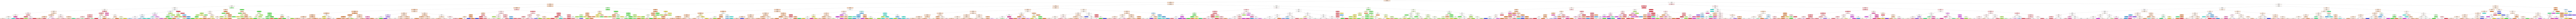

In [165]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X_train.columns.values.tolist(), 
               #class_names=list(y.unique())
               )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [166]:
from sklearn.metrics import classification_report
pred_dt_binary = dt_model.predict(X_valid)
print(classification_report(y_valid, pred_dt_binary))

              precision    recall  f1-score   support

         1.0       0.37      0.93      0.52     27287
         2.0       0.51      0.02      0.04      4365
         3.0       0.24      0.08      0.12      5978
         4.0       0.77      0.08      0.15      5340
         5.0       0.28      0.01      0.02      5218
         6.0       0.45      0.03      0.05      5534
         7.0       0.52      0.03      0.07      5096
         8.0       0.30      0.01      0.01      4546
         9.0       0.41      0.03      0.06      5692
        10.0       0.15      0.06      0.08      6202
        11.0       0.15      0.21      0.17      6812
        12.0       0.48      0.29      0.36      8416

    accuracy                           0.34     90486
   macro avg       0.38      0.15      0.14     90486
weighted avg       0.38      0.34      0.24     90486



# Random Forest

In [167]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()  

print(rf_model)

rf_model.fit(X_train, y_train)  
pred_rf = rf_model.predict(X_test)  

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


KeyboardInterrupt: ignored

In [ ]:
print(classification_report(y_test, pred_rf.round(0)))

# XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()

print(xgb_model)

xgb_model.fit(X_train, y_train)
pred_xgb =  xgb_model.predict_proba(X_test)[:, 1]

In [ ]:
print(classification_report(y_test, pred_xgb.round(0)))

# Evaluating model

In [ ]:
# calculate scores
auc_dt = roc_auc_score(y_valid, pred_dt)

# calculate roc curves
fpr_dt, tpr_dt, _ = roc_curve(y_valid, pred_dt)

plt.figure(figsize=(15, 10))
# plot horizontal line 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_dt, tpr_dt, label='DT (AUC = %0.2f)' % auc_dt)

# axis labels
plt.xlabel('FPR')
plt.ylabel('TPR')
# show the legend
plt.legend(loc='lower right')
# show the plot
plt.show()

In [ ]:
# calculate scores
auc_rf = roc_auc_score(y_test, pred_rf)

# calculate roc curves
fpr_dt, tpr_dt, _ = roc_curve(y_test, pred_rf)

plt.figure(figsize=(15, 10))
# plot horizontal line 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_dt, tpr_dt, label='DT (AUC = %0.2f)' % auc_rf)

# axis labels
plt.xlabel('FPR')
plt.ylabel('TPR')
# show the legend
plt.legend(loc='lower right')
# show the plot
plt.show()

In [ ]:
# calculate scores
auc_dt = roc_auc_score(y_valid, pred_dt)
auc_rf = roc_auc_score(y_test, pred_rf)
auc_xgb = roc_auc_score(y_test, pred_xgb)

# calculate roc curves
fpr_dt, tpr_dt, _ = roc_curve(y_valid, pred_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, pred_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, pred_xgb)

plt.figure(figsize=(15, 10))
# plot horizontal line 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_dt, tpr_dt, label='DT (AUC = %0.2f)' % auc_dt)
plt.plot(fpr_rf, tpr_rf, label='RF (AUC = %0.2f)' % auc_rf)
plt.plot(fpr_xgb, tpr_xgb, label='XGB (AUC = %0.2f)' % auc_xgb)

# axis labels
plt.xlabel('FPR')
plt.ylabel('TPR')
# show the legend
plt.legend(loc='lower right')
# show the plot
plt.show()

### Training

### Variable Back-Filling

## Day

### Splitting Data

Correct Using A-Prior Information

## Build Input Variables

In [ ]:
#Idenifies Dates After 2015
#Note: July 15th 2015 standardized and shifted the Global Release Day to Fridays
date_time_gaps_global_release = tracks["release_year"].loc[date_time_gaps] > 2015



In [ ]:
#categorical_cols = [
#   "release_month",
#   "release_dayofweek"
#]

categorical_cols

In [ ]:
categorical_numerical_columns = [
  "key",
  "mode",
  "time_signature",
  "release_year",
  "release_decade",
  "release_quarter",
  "release_endofmonth"
]
categorical_numerical_columns

In [ ]:
continuous_numerical_columns = [
   "danceability",
   "energy",
   "loudness",
   "speechiness",
   "acousticness",
   "tempo",
   "valence",
   "liveness",
   "instrumentalness"
]
continuous_numerical_columns

In [ ]:
name 	
popularity 	
duration_ms 	
explicit 	
artists

Creates Collection Of Categories Of Interest

In [ ]:
song_data = tracks[categorical_cols + categorical_numerical_columns + continuous_numerical_columns + continuous_numerical_columns_standardized]
song_data.head()

Standardizes Continuous Numerical Ranges Using Z-Score Normalization

In [ ]:
scaler = MinMaxScaler()
scaler.fit(song_data.iloc[continuous_numerical_columns])
song_data.iloc[continuous_numerical_columns] = scaler.transform(song_data.iloc[continuous_numerical_columns])
song_data.iloc[continuous_numerical_columns]

Creates Dummy Variables

In [ ]:
song_data = pd.get_dummies(data = song_data, columns=(categorical_numerical_columns + categorical_cols), drop_first=False)
song_data

Creates Final Processed Dataset

In [ ]:
X = song_data
X = X.reset_index()